In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read image

#image = cv2.imread("D:\\Study\\DataScience\\OpenCV\\basket2.jpg")
image = cv2.imread("D:\\Study\\DataScience\\OpenCV\\OCR\\mrcnn\\images\\messi1.jpg")


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#tagline
tagline = 'This is the tagline'

#image_logo = False
image_logo = True

# read logo
logo = cv2.imread("D:\\Study\\DataScience\\OpenCV\\OCR\\mrcnn\\images\\logo.png")
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
logo = cv2.resize(logo, (80, 80))

## Get the regions using Mask RCNN

In [3]:
# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dty

In [4]:
ROOT_DIR = 'D:\\Study\\DataScience\\OpenCV\\OCR\\mrcnn'
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
WEIGHTS_DIR = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# load the class label names from disk, one label per line
CLASS_NAMES = open('D:\\Study\\DataScience\\OpenCV\\OCR\\mrcnn\\coco_labels.txt').read().strip().split("\n")

In [5]:
class SimpleConfig(Config):
    # give the configuration a recognizable name
    NAME = "coco_inference"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background
    # but the background class is *already* included in the class
    # names)
    NUM_CLASSES = len(CLASS_NAMES)

In [6]:
# initialize the inference configuration
config = SimpleConfig()
#config.display()

In [7]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(WEIGHTS_DIR, by_name=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [8]:
regions = model.detect([image], verbose=0)[0]

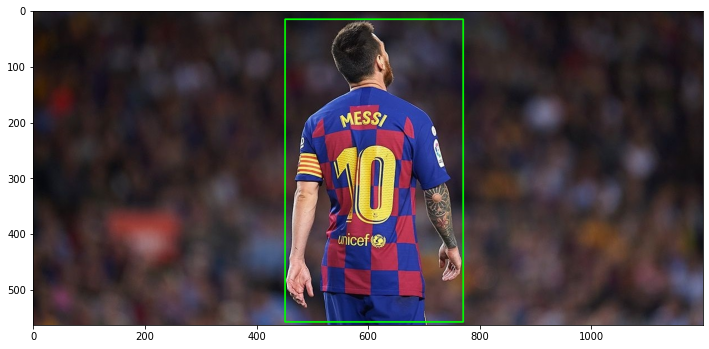

In [9]:
# loop over the regions

for i in range(0, len(regions["rois"])):
    # extract the bounding box information
    
    (startY, startX, endY, endX) = regions["rois"][i]
   
    # draw the bounding box, class label, and score of the object
    cv2.rectangle(image, (startX, startY), (endX, endY), (0,255,0), 2)
    
  
 # show the output image
plt.figure(figsize = (12,10))
plt.imshow(image)

## Use the regions to identify the intersect with tagline

In [10]:
def object_intersect(image, tagline, regions):
    
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 

    # fontScale 
    fontScale = 2
        
    # Yellow font color in RGB 
    color = (255,0,0) 
  
    # Line thickness of 2 px 
    thickness = 2
        
    # Size of the textbox             
    textsize = cv2.getTextSize(tagline, font, fontScale, thickness)[0]

    # Origin or anchor point of the text with tagline
    origin_top = (int((image.shape[1]-textsize[0])/2),int(image.shape[0]*10/100))
    
    # Seperate X, Y, Width and Height values
    X = origin_top[0]
    Y = origin_top[1]
    W = textsize[0]
    H = textsize[1]
    
    # Loop over the regions detected using Mask RCNN
    for i in range(0, len(regions["rois"])):

        (startY, startX, endY, endX) = regions["rois"][i]
        X1 = startX
        Y1 = startY
        W1 = endX - startX
        H1 = endY - startY
        
        # If the textbox intersects with the regions then return True else return False
        if (X1+W1<X or X+W<X1 or Y1+H1<Y or Y+H<Y1):
        
            return False
            break
  
        # This else executes only if break is NEVER reached and loop terminated after all iterations. 
    else:
        return True 

In [11]:
is_intersect = object_intersect(image, tagline, regions)

## Define placement of tagline

In [12]:
# Place tagline at bottom if there is region intersect


def add_tagline_bottom(image, tagline):
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 

    # fontScale 
    fontScale = 2
        
    # Yellow font color in RGB 
    color = (255,0,0) 
  
    # Line thickness of 2 px 
    thickness = 2
    
    # Size of the textbox             
    textsize = cv2.getTextSize(tagline, font, fontScale, thickness)[0]
    
    # Origin of the tagline textbox
    origin_bottom = (int((image.shape[1]-textsize[0])/2), image.shape[0]-int(image.shape[0]*15/100))
    
    # Create Image with tagline
    tagged_image = cv2.putText(image, tagline, origin_bottom, font, fontScale, color, thickness, cv2.LINE_AA)
        
    return tagged_image
    

    
# Place tagline at top if there is no region intersect

def add_tagline_top(image, tagline):
    
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 

    # fontScale 
    fontScale = 2
        
    # Yellow font color in RGB 
    color = (255,0,0) 
  
    # Line thickness of 2 px 
    thickness = 2
    
    # Size of the textbox             
    textsize = cv2.getTextSize(tagline, font, fontScale, thickness)[0]
    
    # Origin of the tagline textbox
    origin_top = (int((image.shape[1]-textsize[0])/2), int(image.shape[0]*15/100))
    
    # Create Image with tagline
    tagged_image = cv2.putText(image, tagline, origin_top, font, fontScale, color, thickness, cv2.LINE_AA)
    
    return tagged_image

## Define placement of client logo if given

In [13]:
def place_logo(image, logo, loc = None):
            
    x_offset = 50
    y_offset = 50
        
    assert image.shape[0] > logo.shape[0], "Height of main image is less than logo image"
    assert image.shape[1] > logo.shape[1], "Width of main image in less than logo image"
        
    if loc is None:
        loc == 'bc'
            
        image[image.shape[0]-logo.shape[0]-y_offset:image.shape[0]-y_offset,
              int(image.shape[1]-logo.shape[1])//2:int(image.shape[1]-logo.shape[1])//2 + logo.shape[1]] = logo
            
    else:
 
        assert loc in ['tl', 'bl', 'tr', 'br'], "Please specify corrent location from 'tl', 'bl', 'tr', 'br'"
        
          
        if loc == 'br':
                image[image.shape[0]- logo.shape[0]-y_offset:image.shape[0]-y_offset, 
                  image.shape[1]- logo.shape[1]-x_offset:image.shape[1]-x_offset] = logo
            
        elif loc == 'tl':
                image[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]] = logo
            
        elif loc == 'bl':
                image[image.shape[0]- shape[0]-y_offset:image.shape[0]-y_offset, 
                  x_offset:x_offset+logo.shape[1]] = logo
            
        elif loc == 'tr':
                image[y_offset:y_offset+logo.shape[0], 
                  image.shape[1]- logo.shape[1]-x_offset:image.shape[1]-x_offset] = logo
 

    return image

## Create Image with tagline and logo

Has intersect and logo


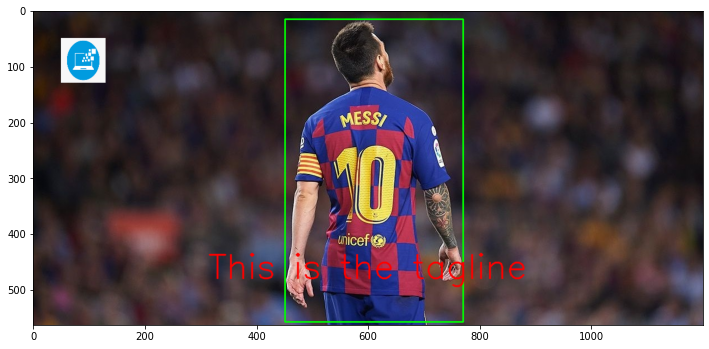

In [14]:
if is_intersect:
    if image_logo is False:
        print('Has intersect and no logo')
        layout = add_tagline_bottom(image, tagline)
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
        
    else:
        print('Has intersect and logo')
        layout = add_tagline_bottom(image, tagline)
        layout = place_logo(layout, logo, 'tl')
        plt.figure(figsize=(12,10))
        plt.imshow(layout)

else:
    if image_logo is False:        
        print('Has no intersect and no logo')
        layout = add_tagline_top(image, tagline)
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
        
    else:
        print('Has no intersect and logo')
        layout = add_tagline_top(image, tagline)
        layout = place_logo(layout, logo)
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
        